In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('datasets\mushroom_cleaned.csv')
df

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
...,...,...,...,...,...,...,...,...,...
54030,73,5,3,2,0.887740,569,12,0.943195,1
54031,82,2,3,2,1.186164,490,12,0.943195,1
54032,82,5,3,2,0.915593,584,12,0.888450,1
54033,79,2,3,2,1.034963,491,12,0.888450,1


In [79]:
df.shape

(54035, 9)

In [80]:
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [81]:
df.isna().sum()

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

In [82]:
df.duplicated().sum()

303

In [83]:
df.drop_duplicates(inplace=True)

In [84]:
df.duplicated().sum()

0

In [85]:
df.dtypes

cap-diameter         int64
cap-shape            int64
gill-attachment      int64
gill-color           int64
stem-height        float64
stem-width           int64
stem-color           int64
season             float64
class                int64
dtype: object

<Axes: >

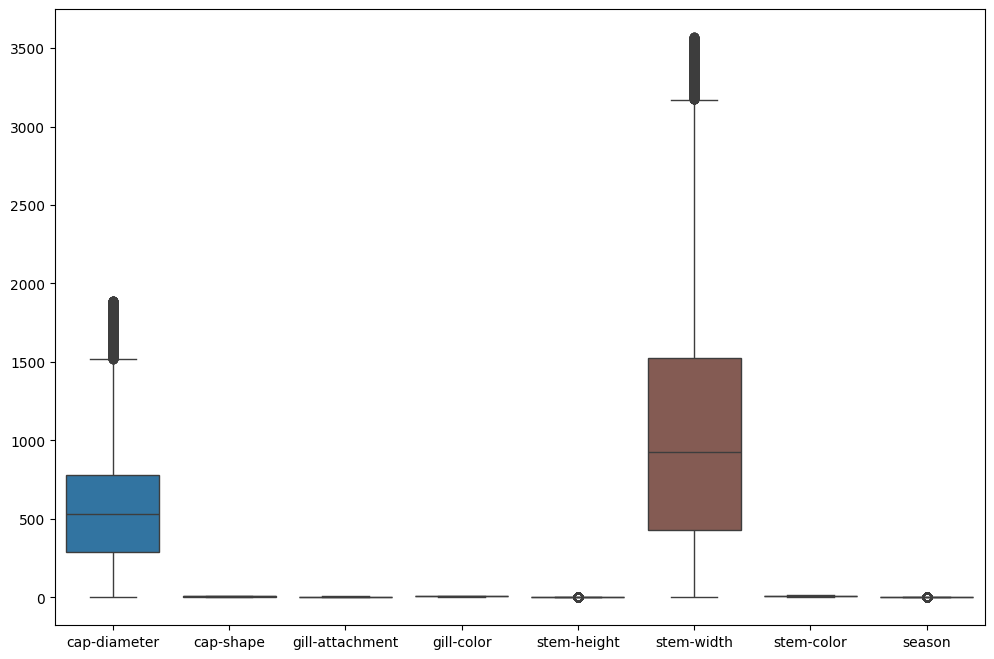

In [86]:
col=['cap-diameter','cap-shape','gill-attachment','gill-color','stem-height','stem-width','stem-color','season']
plt.figure(figsize=(12,8))
sns.boxplot(df[col])



In [87]:
col=['cap-diameter','stem-height','stem-width','season']

for col in col:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)

    IQR=Q3-Q1
    lowwer_fence=Q1-1.5*IQR
    upper_fence=Q3+1.5*IQR

    df[col]=np.where((pd.Series(df[col])>=upper_fence) | (pd.Series(df[col])<=lowwer_fence), df[col].median(),df[col])

In [88]:
x=df.drop('class',axis=1)
y=df['class']
x

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season
0,1372.0,2,2,10,0.589316,1545.0,11,0.943195
1,1461.0,2,2,10,0.589316,1557.0,11,0.943195
2,1371.0,2,2,10,0.589316,1566.0,11,0.943195
3,1261.0,6,2,10,0.589316,1566.0,11,0.943195
4,1305.0,6,2,10,0.589316,1464.0,11,0.943195
...,...,...,...,...,...,...,...,...
54030,73.0,5,3,2,0.887740,569.0,12,0.943195
54031,82.0,2,3,2,1.186164,490.0,12,0.943195
54032,82.0,5,3,2,0.915593,584.0,12,0.888450
54033,79.0,2,3,2,1.034963,491.0,12,0.888450


In [89]:
y

0        1
1        1
2        1
3        1
4        1
        ..
54030    1
54031    1
54032    1
54033    1
54034    1
Name: class, Length: 53732, dtype: int64

In [90]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)


In [91]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [92]:
from sklearn.decomposition import PCA
pca=PCA()
x_train=pca.fit_transform(x_train)
x_test=pca.transform(x_test)

In [93]:
x_train.shape,x_test.shape

((37612, 8), (16120, 8))

In [94]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)
y_pred

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [95]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_test,y_pred)

0.9440446650124069

In [96]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7309
           1       0.95      0.95      0.95      8811

    accuracy                           0.94     16120
   macro avg       0.94      0.94      0.94     16120
weighted avg       0.94      0.94      0.94     16120



In [108]:
#hyperpaameter Tuning
parameter={'criterion':['gini','entropy','log_loss','poisson'],'splitter':['best','random'],'max_depth':[1,2,3,4,5,6,7,8,9,10],'max_features':['auto','sqrt','log2']}
from sklearn.model_selection import  GridSearchCV
grid_search=GridSearchCV(dtc,param_grid=parameter,cv=5,verbose=3)
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV 1/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, sco

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss',
                                       'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             verbose=3)

In [109]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [110]:
best_model=grid_search.best_estimator_
best_model

DecisionTreeClassifier(max_depth=10, max_features='sqrt')

In [111]:
y_pred_tuned=best_model.predict(x_test)
y_pred_tuned

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [112]:
accuracy_score(y_test,y_pred_tuned)

0.7634615384615384

In [102]:
print(classification_report(y_test,y_pred_tuned))

              precision    recall  f1-score   support

           0       0.65      0.65      0.65      7309
           1       0.71      0.71      0.71      8811

    accuracy                           0.69     16120
   macro avg       0.68      0.68      0.68     16120
weighted avg       0.69      0.69      0.69     16120

